# TP1-Image Transformations and Morphological Operations
** ATRIM - Option DATASIM - Ecole Centrale Nantes **

** Diana Mateus **

Participants: ASSERMOUH Maryem - HAD Ikrame



### Objectives 

The goal of this lab session is to understand in practice:
- How to quantitatively characterize an images, e.g. by measuring their properties
- Compute the 
- Use morphological operations in practice 
put in practice some of the concepts studied during the first lecture  implement several of the transformations seen during 

### Instructions
- The most important in your repport are the comments that explain observations and steps.
- Upload to hippocampus BOTH your report AND code (.ipynb). If you choose to create the report directly on a python notebook, you can submit as report the (.html) version of the notebook (in addition tothe .ipynb).
- Deadline is 24th of September 2021 (23:55)

## 0. Preparation


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage.io as io
import numpy.random


__Read and display the images in the provided folders__

Download and unzip the images folder.  If everything goes well, the following code will loop over the images and show them on the screen. 

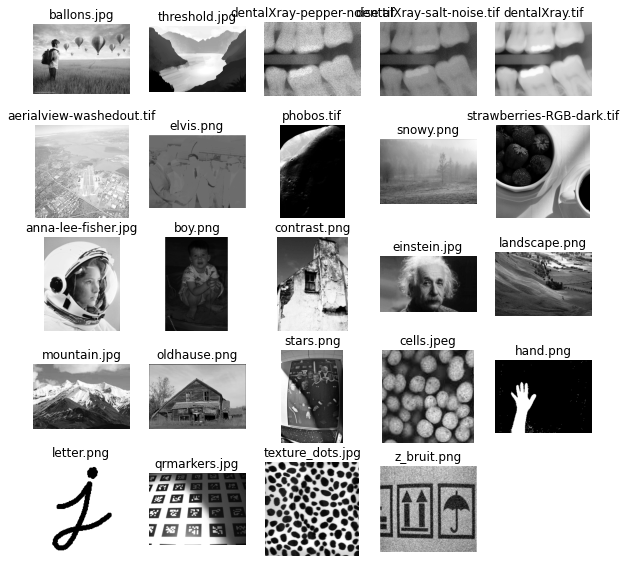

In [12]:
IMDIR = "./images1/" #"/Replace/With/Your/Filepath"
           
#The following lines control how big the images are shown on the screen
width=10 
height=10
plt.rcParams['figure.figsize'] = [width, height]


#we create a figure
fig=plt.figure()

#and look for all available image files in IMDIR
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # uncomment the next line to print the file paths if no image is being shwon
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            
            if im_counter > 25: #showing maximum 25 images
                break
                
            # display it
            plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            im_counter +=1 
            

plt.show()



# 1. Global Measures

### 1.1. Image histograms and global measures

**a)** Create a function that measures the luminance and contrast of an image.

**b)** Create a function to compute and visualize the histogram AND the cummulative histogram of an image, 

*Hint:* You can use ``np.histogram`` or implement your own. In the first case, to plot with ``plt.plot`` you need to compute the bin centers from the bin limits.


**c)** Try the provided shuffle function, which recieves a grayscale image, shuffles its pixels and returns the shuffled image.

*Hint:*
```python
np.random.shuffle(im.ravel())
```
**d)** 
Loop over the images in the ``chestXRay`` folder and apply the shuffle funciton. For each image (before AND after shuffling)
- print the size of the image
- print its min, max values 
- print the computed luminance and contrast.
- plot the image before and after the shuffling
- plot the histogram and cummulative histogram before and after the shuffling
*Hint"* use 
``plt.subplot`` to plot several plots in a single figure


In [9]:
#4students
import skimage.metrics as metrics

def luminance(image):
    siz=image.shape
    M=siz[0]
    N=siz[1]
    som=0
    for i in range(M):
        for j in range(N):
            som+=image[i][j]
    lum=1/(N*M)*som
    return lum

def contrast(image):
    cnt=(image.max()-image.min())/(image.max()+image.min())
    return cnt 

def histogram(image):
    hist = np.zeros(256, int)       # prépare un vecteur de 256 zéros (pour chaque gris)
    for i in range(0,image.shape[0]):      # énumère les lignes
        for j in range(0,image.shape[1]):  # énumère les colonnes
            hist[image[i,j]] = hist[image[i,j]] + 1
    return hist
    
def cummulative_histogram(image):
    hist = histogram(image)
    hc = np.zeros(256, int)         # prépare un vecteur de 256 zéros
    hc[0] = hist[0]
    for i in range(1,256):
        hc[i] = hist[i] + hc[i-1] 
    return hc
#Receives only grayscale images
def shuffle_image(im_gray):
    im_shuffle = im_gray.ravel().copy()
    np.random.shuffle(im_shuffle)
    im_shuffle=np.reshape(im_shuffle, im_gray.shape)
    return im_shuffle

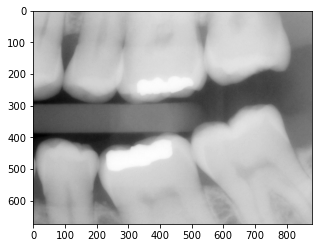

1.0


In [10]:
IMDIR = "./images1/dental/dentalXray.tif" 
im = io.imread(IMDIR,as_gray=True) 
im.astype(float)
plt.imshow(im,'gray')
plt.show()

#Luminance measurement  
lumi=luminance(im)
print(lumi)

#Contrast measurement
contrst=contrast(im)
print(contrst)

#Histogram visualization 
hist=histogram(im)
plt.plot(hist)
plt.show()

#Cummulative histogram visualization
cum_hist=cummulative_histogram(im)
plt.plot(cum_hist)
plt.show()

#Shuffling the image 
im_shuffle=shuffle_image(im)
plt.imshow(im_shuffle,'gray')
plt.show()

In [ ]:
IMDIR = "./images2/chestXray" 
           
#The following lines control how big the images are shown on the screen
width=5 
height=5
plt.rcParams['figure.figsize'] = [width, height]

#we create a figure
fig=plt.figure()

#and look for all available image files in IMDIR
im_counter = 1
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # uncomment the next line to print the file paths if no image is being shwon
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            im_shuffle=shuffle_image(im)
            dimensions=im.shape
            minimum=im.min()
            maximum=im.max()
            lumi=luminance(im)
            contrst=contrast(im)
            hist=histogram(im)
            cum_hist=cummulative_histogram(im)
            hist_shuffle=histogram(im_shuffle)
            cum_hist_shuffle=cummulative_histogram(im_shuffle)

            if im_counter > 25: #showing maximum 25 images
                break
                
            # display it
            #plt.subplot(5,5,im_counter)
            plt.imshow(im, cmap='gray')
            plt.title(filename)
            plt.axis('off')
            plt.show()
            print("Size of the image: ",dimensions)
            print("The min value: ",minimum)
            print("The max value: ",maximum)
            print("Luminance: ",lumi)
            print("Contrast: ",contrst)
            plt.plot(hist)
            plt.show()
            plt.plot(cum_hist)
            plt.show()
            #plt.subplot(5,5,im_counter)
            plt.imshow(im_shuffle,'gray')
            plt.title(filename + " (shuffled)")
            plt.axis('off')
            plt.show()
            print("Size of the image: ",dimensions)
            print("The min value: ",minimum)
            print("The max value: ",maximum)
            print("Luminance: ",lumi)
            print("Contrast: ",contrst)
            plt.plot(hist_shuffle)
            plt.show()
            plt.plot(cum_hist_shuffle)
            plt.show()
            im_counter +=1 
            

### 1.2 PSNR
**a)** Create a function that computes the Peak SNR (PSNR) of an image following the formulae.
*Hint*: The Mean Square Error (MSE) and the Peak Signal to Noise Ratio (PSNR)  are the two error metrics used to compare image quality when a reference image is available. The MSE represents the cumulative squared error between the compressed and the original image, whereas PSNR represents a measure of the peak error. The lower the value of MSE, the lower the error. The higher the https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio

**b)** Using the global measures (min, max, luminance, contrast, histogram, cumulative histogram) above, AND the PSNR. what can you say about the image quality of the images in the ``sombrero`` and ``dental`` folders? Use the best image as reference for the PSNR calculation


In [11]:
import skimage.metrics as metrics
import math

def psnr(original_image,noisy_image):
    psnr = 20*math.log10(original_image.max())- 10*math.log10(metrics.mean_squared_error(original_image, noisy_image))
    return psnr


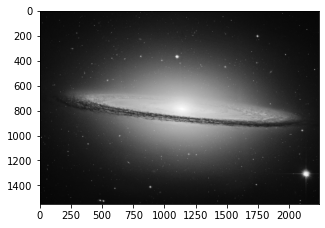

Size of the image:  (1548, 2238)
The min value:  0
The max value:  255
Luminance:  56.43033127584845
Contrast:  1.0


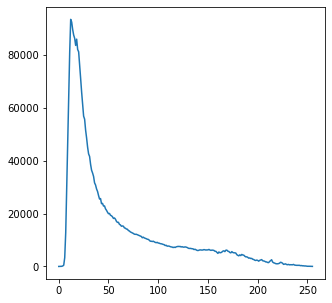

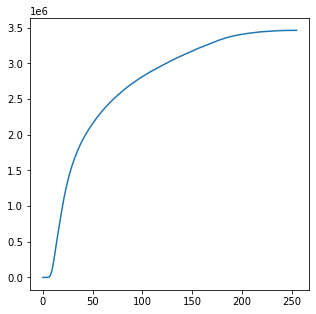

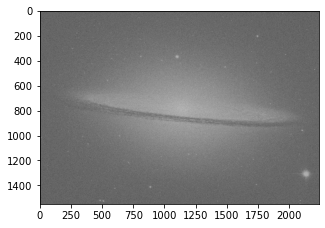

Size of the image:  (1548, 2238)
The min value:  0
The max value:  255
Luminance:  115.305205425202
Contrast:  1.0


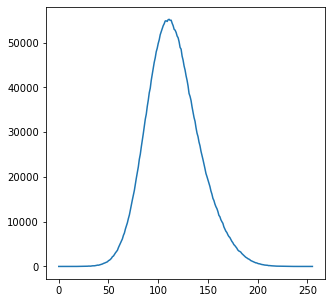

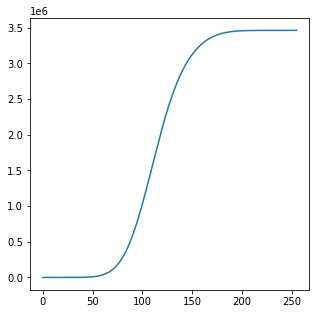

PSNR = 11.041449507413432


In [12]:
#PSNR GALAXY

imf = "./images2/sombrero/sombrero-galaxy-original.tif" 
noisyf = "./images2/sombrero/sombrero-galaxy-noisy.tif"

width=5 
height=5
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()
im1 = io.imread(imf,as_gray=True) 
plt.imshow(im1,'gray')
plt.show()
dimensions=im1.shape
minimum=im1.min()
maximum=im1.max()
lumi=luminance(im1)
contrst=contrast(im1)
hist1=histogram(im1)
cum_hist1=cummulative_histogram(im1)
print("Size of the image: ",dimensions)
print("The min value: ",minimum)
print("The max value: ",maximum)
print("Luminance: ",lumi)
print("Contrast: ",contrst)
plt.plot(hist1)
plt.show()
plt.plot(cum_hist1)
plt.show()
im2 = io.imread(noisyf,as_gray=True) 
plt.imshow(im2,'gray')
plt.show()
dimensions=im2.shape
minimum=im2.min()
maximum=im2.max()
lumi=luminance(im2)
contrst=contrast(im2)
hist2=histogram(im2)
cum_hist2=cummulative_histogram(im2)
print("Size of the image: ",dimensions)
print("The min value: ",minimum)
print("The max value: ",maximum)
print("Luminance: ",lumi)
print("Contrast: ",contrst)
plt.plot(hist2)
plt.show()
plt.plot(cum_hist2)
plt.show()
psn=psnr(im1,im2)
print("PSNR =", psn)

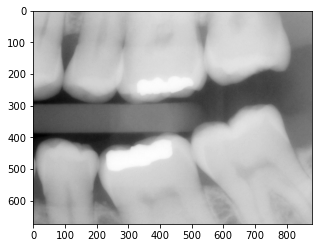

<ipython-input-75-194865634cbf>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  cnt=(im.max()-im.min())/(im.max()+im.min())


Size of the image:  (674, 882)
The min value:  0
The max value:  255
Luminance:  166.81815673846194
Contrast:  11.0


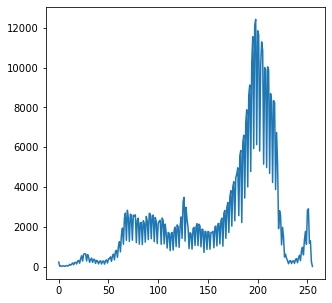

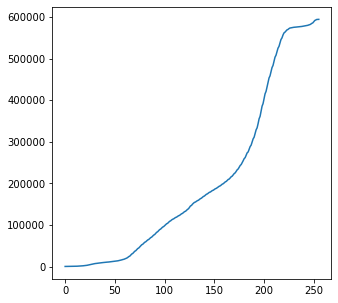

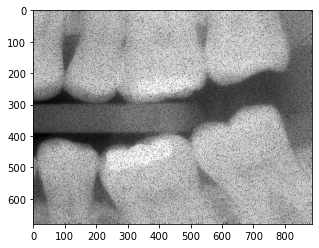

<ipython-input-75-194865634cbf>:16: RuntimeWarning: overflow encountered in ubyte_scalars
  cnt=(im.max()-im.min())/(im.max()+im.min())


Size of the image:  (680, 888)
The min value:  0
The max value:  255
Luminance:  150.11242547694755
Contrast:  11.0


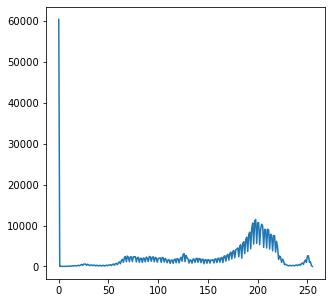

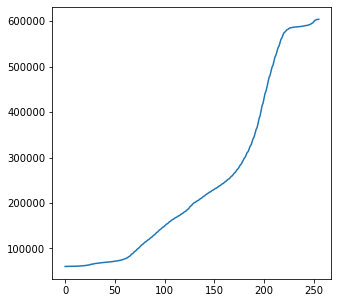

PSNR = 3.305809177812222


In [231]:
import  skimage.transform as transform
#PSNR DENTAL
#Make sure that images match sizes otherwise you can use transform.resize(original_image, target_image.shape)

imf = "./images1/dental/dentalXray.tif" 
noisyf = "./images1/dental/dentalXray-pepper-noise.tif"

width=5 
height=5
plt.rcParams['figure.figsize'] = [width, height]
fig=plt.figure()
im1 = io.imread(imf,as_gray=True) 
plt.imshow(im1,'gray')
plt.show()
dimensions=im1.shape
minimum=im1.min()
maximum=im1.max()
lumi=luminance(im1)
contrst=contrast(im1)
hist1=histogram(im1)
cum_hist1=cummulative_histogram(im1)
print("Size of the image: ",dimensions)
print("The min value: ",minimum)
print("The max value: ",maximum)
print("Luminance: ",lumi)
print("Contrast: ",contrst)
plt.plot(hist1)
plt.show()
plt.plot(cum_hist1)
plt.show()
im2 = io.imread(noisyf,as_gray=True) 
plt.imshow(im2,'gray')
plt.show()
dimensions=im2.shape
minimum=im2.min()
maximum=im2.max()
lumi=luminance(im2)
contrst=contrast(im2)
hist2=histogram(im2)
cum_hist2=cummulative_histogram(im2)
print("Size of the image: ",dimensions)
print("The min value: ",minimum)
print("The max value: ",maximum)
print("Luminance: ",lumi)
print("Contrast: ",contrst)
plt.plot(hist2)
plt.show()
plt.plot(cum_hist2)
plt.show()
resized_im2=transform.resize(im2,im1.shape)
psn=psnr(im1,resized_im2)
print("PSNR =", psn)

# 2. Intensity transformations and Histograms

### 2.1 Color to grayscale and grayscale to black and white 
**(a)** Create a function that receives as input a color image and transforms it to grayscale. Read the image **outside** the function. Apply the function to the ```ballons.jpg``` image.

**(b)** Create a function that reads a grayscale image and given a parameter ```k``` implements a threshold function and provides. Apply and show the result on the ```threshold.jpg``` image. Show the results for various k. **Hint**: you may want to use the ```np.where``` function

**Advanced**: you may want to use the ```interact``` from 
```
from ipywidgets import interact
import ipywidgets as widgets
```
to create a sliding bar for the threshold parameter or the color saturation

In [25]:
def color_gray(im):
    n=im.shape[0]
    m=im.shape[1]
    a=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            a[i][j]=np.dot(im[i][j],[0.3086,0.6094,0.0820])
    return a
def k_threshold(im,k):
    out=np.where(im<k,0,1)
    return out 

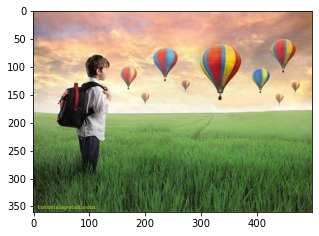

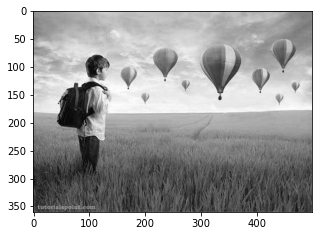

In [26]:
im1 = io.imread('images1/ballons.jpg')
plt.imshow(im1)
plt.show()
gray=color_gray(im1)
plt.imshow(gray,'gray')
plt.show()
#im = io.imread('images1/threshold.jpg',as_gray=True)
#plt.imshow(im,'gray')
#plt.show()
#seuil=k_threshold(im,0.9)
#plt.imshow(seuil,'gray')
#plt.show()


### 2.3 Graylevel transformations and transfer functions

Implement the following graylevel transformations as independent functions. Then apply the functions to the images in the 
```
histograms
``` 
folder.

**a)** Implement a generic linear transformation parameterized by a and b such that its transfer function has the form ```f(x) = a x + b``` 

**b)** Implement a function that inverts the image intensities

**c)** Implement one of the nonlinear parametric transfer functions (normalization with saturation, contrast stretching, gamma, ...)

**(d)** Plot the transfer functions for all transformations in (a) to (d)

**(e)** Loop over the images in the folder and display the results for each image:
- The original and the transformed images.
- The transfer function
- The corresponding histogram. 

**Hints** 
- set the horizontal limits fo the histograms to a fix size e.g. ```set_lim([0 255])```
- Make sure that the histograms associated to a single figure have comparable vertical axis limits. 


IMDIR = "./images/histograms"



In [71]:
import matplotlib.pyplot as plt
import numpy as np

def linear_transf(im,a,b):
    n,m=im.shape
    for i in range(n):
        for j in range(m):
            im[i][j]=a*im[i][j]+b
    return im 

def negation(im):
    out=linear_transf(im,-1,255)
    return out 

def normalization(im):
    n,m=im.shape
    maxi=im.max()
    mini=im.min()
    for i in range(n):
        for j in range(m):
            im[i][j]=(255/(maxi-mini))*(im[i][j]-mini)
    return im 

import math
def contrast_stretching(im,t,w):
    n,m=im.shape
    for i in range(n):
        for j in range(m):
            im[i][j]=1/(1+np.exp((-im[i][j]+t)/w))
    return im 

def gamma(im,c,gam):
    n,m=im.shape
    for i in range(n):
        for j in range(m):
            im[i][j]=c*pow(im[i][j],gam)
    return im 

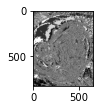

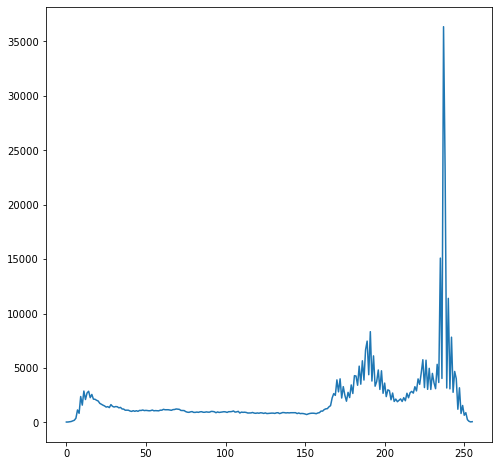

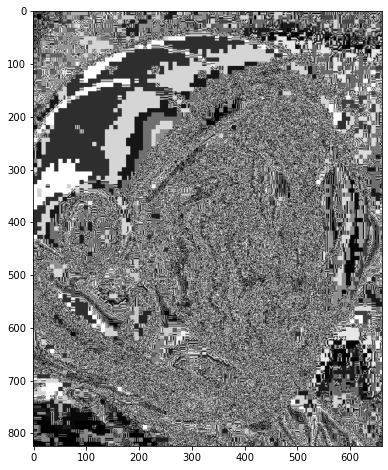

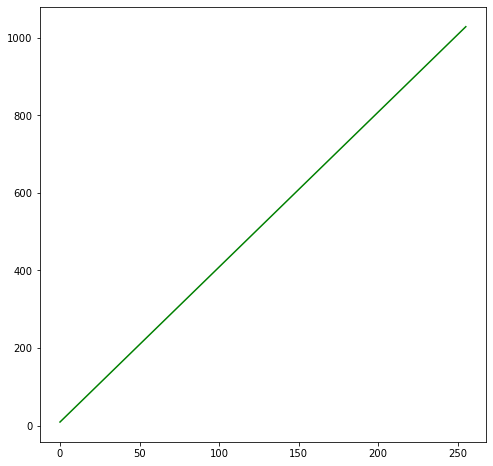

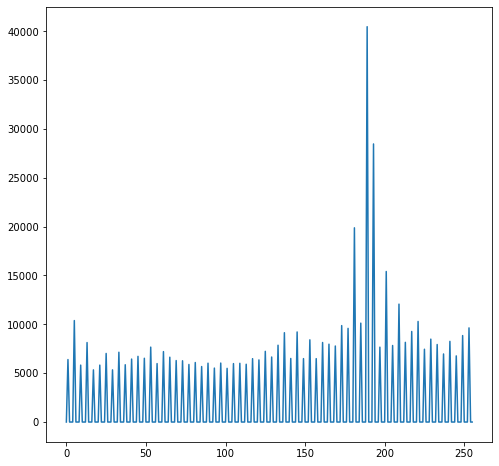

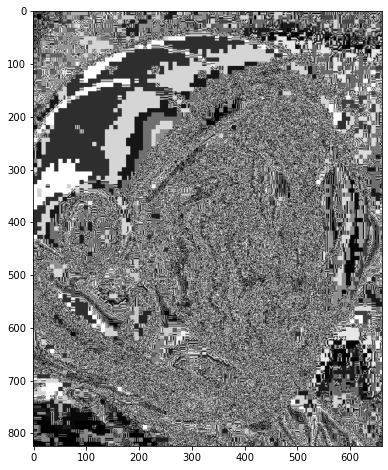

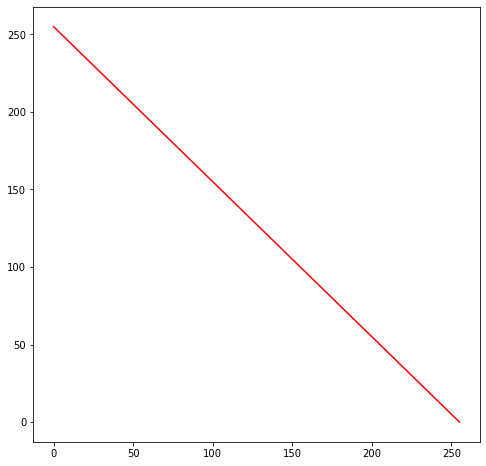

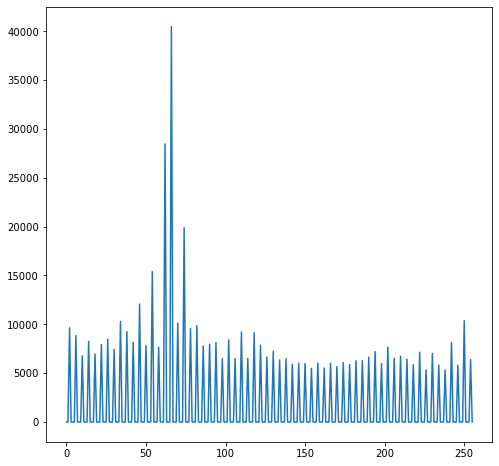

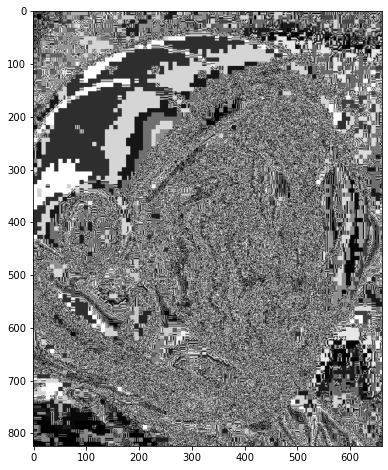

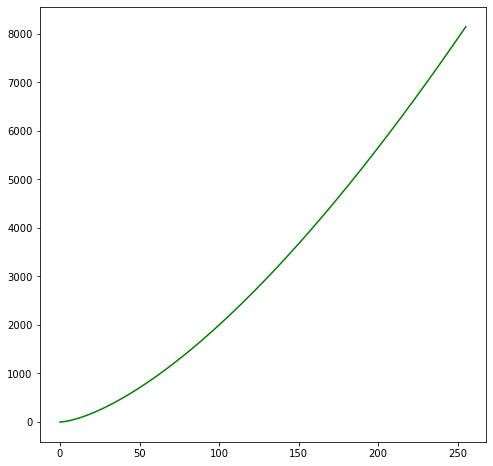

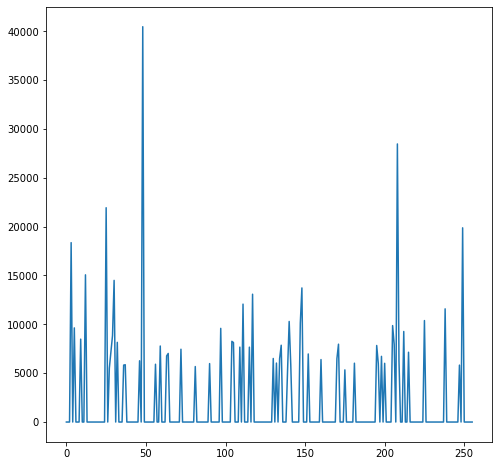

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
import math
IMDIR = "./images1/histograms" 
           
#The following lines control how big the images are shown on the screen
#width=8 
#height=8
#plt.rcParams['figure.figsize'] = [width, height]

#we create a figure
#fig=plt.figure()

#and look for all available image files in IMDIR
for root, dirnames, filenames in os.walk(IMDIR):
    for filename in filenames:
        f = os.path.join(root, filename)
        
        #filter only image files with the following format
        if f.endswith(('.png', '.jpg', '.jpeg','.JPG', '.tif', '.gif')):
            
            # uncomment the next line to print the file paths if no image is being shwon
            # print(filename)
            
            # read the image 
            im = io.imread(f,as_gray=True)
            hist=histogram(im)
            im2 = linear_transf(im,4,9)
            hist2= histogram(im2)
            im3 = negation(im)
            hist3=histogram(im3)
            im6 = gamma(im,2,1.5)
            hist6=histogram(im6)
            plt.subplot(5,5,im_counter)
            #image d'origine
            plt.imshow(im,'gray')
            plt.show()
            #histogramme d'origine
            plt.plot(hist)
            plt.show()
            #image transformée 2
            plt.imshow(im2,'gray')
            plt.show()
            #fontion de transfert 1
            x = np.linspace(0,255,1000)
            y = 4*x+9
            plt.plot(x,y,'g',label='linear transformation')
            plt.show()
            #histogramme transformé 2
            plt.plot(hist2)
            plt.show()
            #image transformée 3
            plt.imshow(im3,'gray')
            plt.show()
            #fontion de transfert 2
            x = np.linspace(0,255,1000)
            y = -x+255
            plt.plot(x,y,'r',label='negation')
            plt.show()
            #histogramme transformé 3
            plt.plot(hist3)
            plt.show()
            #image transformée 6
            plt.imshow(im6,'gray')
            plt.show()
            #fontion de transfert 5
            x = np.linspace(0,255,1000)
            y = 2*pow(x,1.5)
            plt.plot(x,y,'g',label='normalization')
            plt.show()
            #histogramme transformé 6
            plt.plot(hist6)
            plt.show() 
            

### 2.4 Histogram equalization

Implement the histogram equalization algorithm and apply it to the images in the ``equalization`` folder. Display the original and the equalized image, the original and the equalized histograms, as well as the original and equalized **cumulative** histograms. 

**Write down a comment about your findings** Explain the resulting images, as well as the shape of the histograms and cumulative histograms before and after the transformation. Why does it make sense to use the cumulative histogram as a transformation?


In [ ]:
IMDIR = "./images/equalize"

width=10
height=5
plt.rcParams['figure.figsize'] = [width, height]

## 3.0 Morphological operations


Loop over the images in the ```morphology``` folder. Apply the following morphological operations to the images by first converting them to grayscale: 

**a)** erosion

**b)** dilation

**c)** closure

**d)** opening

**e)** border extraction

**f)** Apply the filters to the original gray scale images. 
- Explain the results for the binary as well as for the grayscale images. 
- What is the effect of the structuring element shape?

Hints: use the scikit help for morphological operations.  For instance to declare an structuring element use
```python
# declare an structuring elment
selem = disk(6)
# apply a scipy morphological operation
eroded_im = erosion(im, selem)
```


**BONUS** implement your own erosion and dilation functions.

In [59]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import disk
IMDIR = "./images1/morphology/"
selem=disk(6)
i=0
eroded=[]
dilated=[]
closed=[]
opened=[]
borders=[]
for image in os.listdir(IMDIR) :
    im=io.imread(IMDIR+image, as_gray=True)
    eroded_im=erosion(im,selem)
    eroded.append(eroded_im)
    dilated_im=dilation(im,selem)
    dilated.append(dilated_im)
    closed_im=closing(im,selem)
    closed.append(closed_im)
    opened_im=opening(im,selem)
    opened.append(opened_im)
    border=im-eroded_im
    borders.append(border)

In [ ]:
for elt in eroded:
    plt.imshow(elt, 'gray')
    plt.show()
for elt in dilated:
    plt.imshow(elt, 'gray')
    plt.show()
for elt in opened:
    plt.imshow(elt, 'gray')
    plt.show()
for elt in closed:
    plt.imshow(elt, 'gray')
    plt.show()
for elt in borders:
    plt.imshow(elt, 'gray')
    plt.show()